In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
%matplotlib inline
tf.__version__

'2.2.0'

In [2]:
#Cifar10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train = X_train/255.0
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test = X_test/255.0

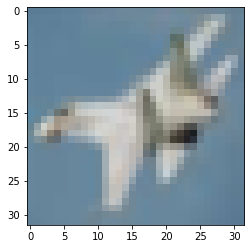

In [6]:
plt.imshow(X_test[10])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, strides=2, padding="valid"))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [9]:
%%time

model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 84s 54ms/step - loss: 1.5620 - sparse_categorical_accuracy: 0.4245
Epoch 2/20
1563/1563 [==============================] - 85s 54ms/step - loss: 1.1104 - sparse_categorical_accuracy: 0.6050
Epoch 3/20
1563/1563 [==============================] - 85s 54ms/step - loss: 0.9332 - sparse_categorical_accuracy: 0.6738
Epoch 4/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.8155 - sparse_categorical_accuracy: 0.7143
Epoch 5/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7319 - sparse_categorical_accuracy: 0.7441
Epoch 6/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.6516 - sparse_categorical_accuracy: 0.7720
Epoch 7/20
1563/1563 [==============================] - 84s 54ms/step - loss: 0.5863 - sparse_categorical_accuracy: 0.7933
Epoch 8/20
1563/1563 [==============================] - 83s 53ms/step - loss: 0.5397 - sparse_categorical_accuracy: 0.8117
Epoch 9/20
1563/

In [10]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test_accuracy: ", test_accuracy)
print("Test_loss:", test_loss)

313/313 [==============================] - 3s 10ms/step - loss: 1.1334 - sparse_categorical_accuracy: 0.7379
Test_accuracy:  0.7379000186920166
Test_loss: 1.1334234476089478
